## PROBLEM STATEMENT

To analyze every tweet sent by Donald trump prior and during his Presidency to see how he used the twitter platform. We will be exploring and analyzing relevant
columns of the data. We will be applying all necessary text preprocessing steps on content column of the tweet data. Also, given that he was suspended from
twitter, we will analyze his tweets for a better understanding of his usage and activity pattern on twitter.

#Data Set Information & Context:

##Tweets from Donald Trump between 2009 and 2020.

- The data has got Content , Date, Nu. of Retweet, No. of Favorites, column of the tweets.
- The data has got  pre labelled sentiment(Positive and negative) column for each content of tweets.
- We will be  exploring and analyzing  relevant columns of the data.
- We will be applying all necessary text pre processing steps on content column of the tweet data.


##**Steps:**
- Import necessary libraries.
- Get the data.
- Remove the column based on missing value and relevance of the column.
- Explore each column of the data.& plot the graphs and mention the observation and insights based on the outcome.
- Apply all necessary text pre processing steps on the required column.
- Plot  frequency, bar and word cloud charts based on the individual and interaction of the columns.
- Summarize the outcome from each steps, observation and insights.


### Data Description


- **id**: Unique tweet id

- **link**: Link to tweet

- **content**: Text of tweet

- **date**: Date of tweet

- **retweets**: Number of retweets

- **favorites**: Number of favorites

- **mentions**: Accounts mentioned in tweet

- **Sentiment**: Sentiment of each tweet in the content column

## Importing necessary libraries

In [1]:
import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [2]:
from google.colab import files

uploaded = files.upload()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Dataset

In [4]:
tweets=pd.read_csv('/content/drive/MyDrive/GL/Machine Learning/guided/trump_tweets.csv')                             #Importing the data

In [5]:
data=tweets.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [6]:
data.head() ##  Complete the code to view top 5 rows of the data

,Unnamed: 0,id,link,content,date,retweets,favorites,mentions,hashtags,geo,Sentiment
0,0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,positive
1,1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,positive
2,2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN,positive
3,3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN,positive
4,4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN,positive


In [7]:
data.tail(5) ##  Complete the code to view last 5 rows of the data

,Unnamed: 0,id,link,content,date,retweets,favorites,mentions,hashtags,geo,Sentiment
41117,41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN,positive
41118,41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN,negative
41119,41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN,positive
41120,41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN,negative
41121,41121,1219076533354037249,https://twitter.com/realDonaldTrump/status/121...,A great show! Check it out tonight at 9pm. @ F...,2020-01-20 02:57:49,7947,34902,@,NaN,NaN,positive


### Understand the shape of the dataset

In [8]:
data.shape

(41122, 11)

### Check the data types of the columns for the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  41122 non-null  int64  
 1   id          41122 non-null  int64  
 2   link        41122 non-null  object 
 3   content     41122 non-null  object 
 4   date        41122 non-null  object 
 5   retweets    41122 non-null  int64  
 6   favorites   41122 non-null  int64  
 7   mentions    22467 non-null  object 
 8   hashtags    5810 non-null   object 
 9   geo         0 non-null      float64
 10  Sentiment   41122 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.5+ MB


###Missing Value analysis

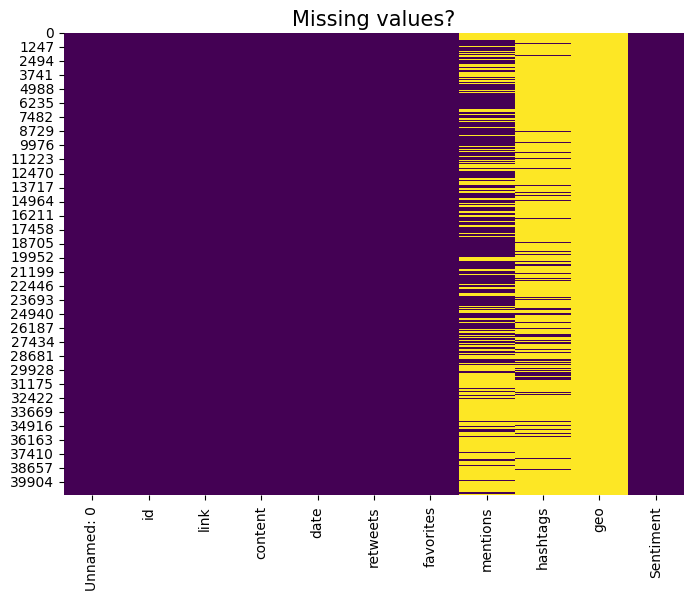

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

In [11]:
data.isna().sum()


Unnamed: 0        0
id                0
link              0
content           0
date              0
retweets          0
favorites         0
mentions      18655
hashtags      35312
geo           41122
Sentiment         0
dtype: int64

 * Geo column has got all values as nulls, hashtags have too many null values, mentions also have too many null values.

The below function, will give these output in Dataframe

- **Zero Values**
- **Missing Values**
- **% of Total Values**
- **Total Zero Missing Values**
- **% Total Zero Missing Values**
- **Data Type**

In [12]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            # Nu of zero in each column
        mis_val = df.isnull().sum()                                                                #Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                        #Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         #Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               #Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  #column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     #Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table



In [14]:
missing_zero_values_table(data)

Your selected dataframe has 11 columns and 41122 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
geo,0,41122,100.0,41122,100.0,float64
hashtags,0,35312,85.9,35312,85.9,object
mentions,0,18655,45.4,18655,45.4,object


In [15]:
#Drop the column which have got too many missing values or does not relevent information
data.drop(['Unnamed: 0', 'id','link','mentions','hashtags','geo'],axis=1,inplace=True)
data.shape

(41122, 5)

In [16]:
year=[]
month=[]
date=[]
hour=[]
for x in data['date']:
    year.append(int(x.split("-")[0]))                                          #extraction of year from date column and appending into list
    month.append(int(x.split("-")[1]))                                         #extraction of month from date column and appending into list
    date.append(int(x.split("-")[2].split(" ")[0]))                            #extraction of date of the month from date column and appending into list
    hour.append(int(x.split("-")[2].split(" ")[1].split(":")[0]))              #extraction of hour of that day from date column and appending into list

data['year']= year
data['month']=month
data['date']=date
data['hour']=hour
data.head()

,content,date,retweets,favorites,Sentiment,year,month,hour
0,Be sure to tune in and watch Donald Trump on L...,4,500,868,positive,2009,5,20
1,Donald Trump will be appearing on The View tom...,5,33,273,positive,2009,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,8,12,18,positive,2009,5,15
3,New Blog Post: Celebrity Apprentice Finale and...,8,11,24,positive,2009,5,22
4,"""My persona will never be that of a wallflower...",12,1399,1965,positive,2009,5,16


**bold text**####Most liked tweet during Presidential year

In [23]:
president_date=president_year=data[((data['year']>=2017) &(data['month']>1))]      # Extraction of Presidency year data
print(data.iloc[data['favorites'].idxmax()]['content'])                      # Most favorites tweet
print(data.iloc[data['favorites'].idxmax()]['year'])                         # Year of the most favorites tweet



A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!
2019


####Most retweeted tweet during presidential year

In [24]:
print(data.iloc[data['retweets'].idxmax()]['content'])                      # Most retweeted tweet
print(data.loc[data['favorites'].idxmax(), 'year'])                      # Year of the most favorites tweet

# FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg
2019


### Number of characters in tweets

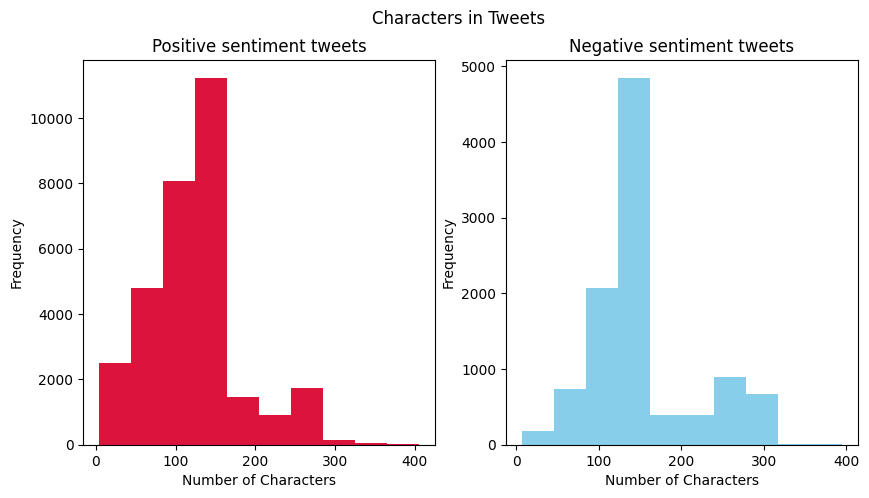

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

tweet_len_positive = data[data['Sentiment'] == 'positive']['content'].str.len()
ax1.hist(tweet_len_positive, color='crimson')
ax1.set_title('Positive sentiment tweets')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Frequency')

tweet_len_negative = data[data['Sentiment'] == 'negative']['content'].str.len()
ax2.hist(tweet_len_negative, color='skyblue')
ax2.set_title('Negative sentiment tweets')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Frequency')

fig.suptitle('Characters in Tweets')

plt.show()


### Number of words in a tweet

Text(0.5, 0.98, 'Words in a tweet')

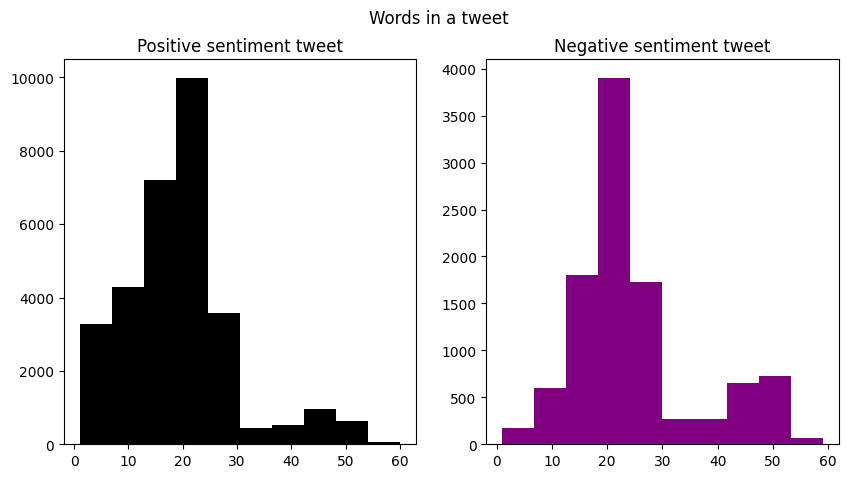

In [30]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = data[data['Sentiment'] == 'positive']['content'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='black')
ax1.set_title('Positive sentiment tweet')
tweet_len = data[data['Sentiment'] == 'negative']['content'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='purple')
ax2.set_title('Negative sentiment tweet')
fig.suptitle('Words in a tweet')

####Most active hour on twitter

In [33]:
data.columns

Index(['content', 'date', 'retweets', 'favorites', 'Sentiment', 'year',
       'month', 'hour'],
      dtype='object')

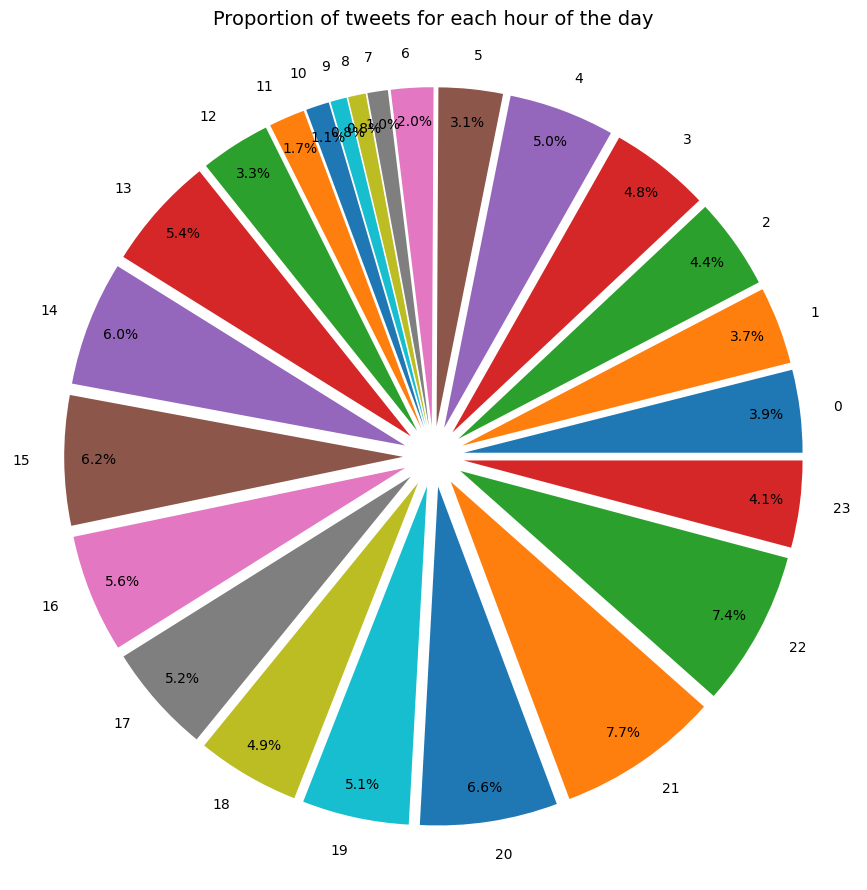

In [34]:

# Using matplotlib
Category = data.groupby('hour').size()  # Counting the number of tweets for each hour

pie, ax = plt.subplots(figsize=[20, 11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09] * 24, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=14)
plt.show()
# pie.savefig("DeliveryPieChart.png")





####Number of tweet, retweet, favorite per Year

*   List item
*   List item



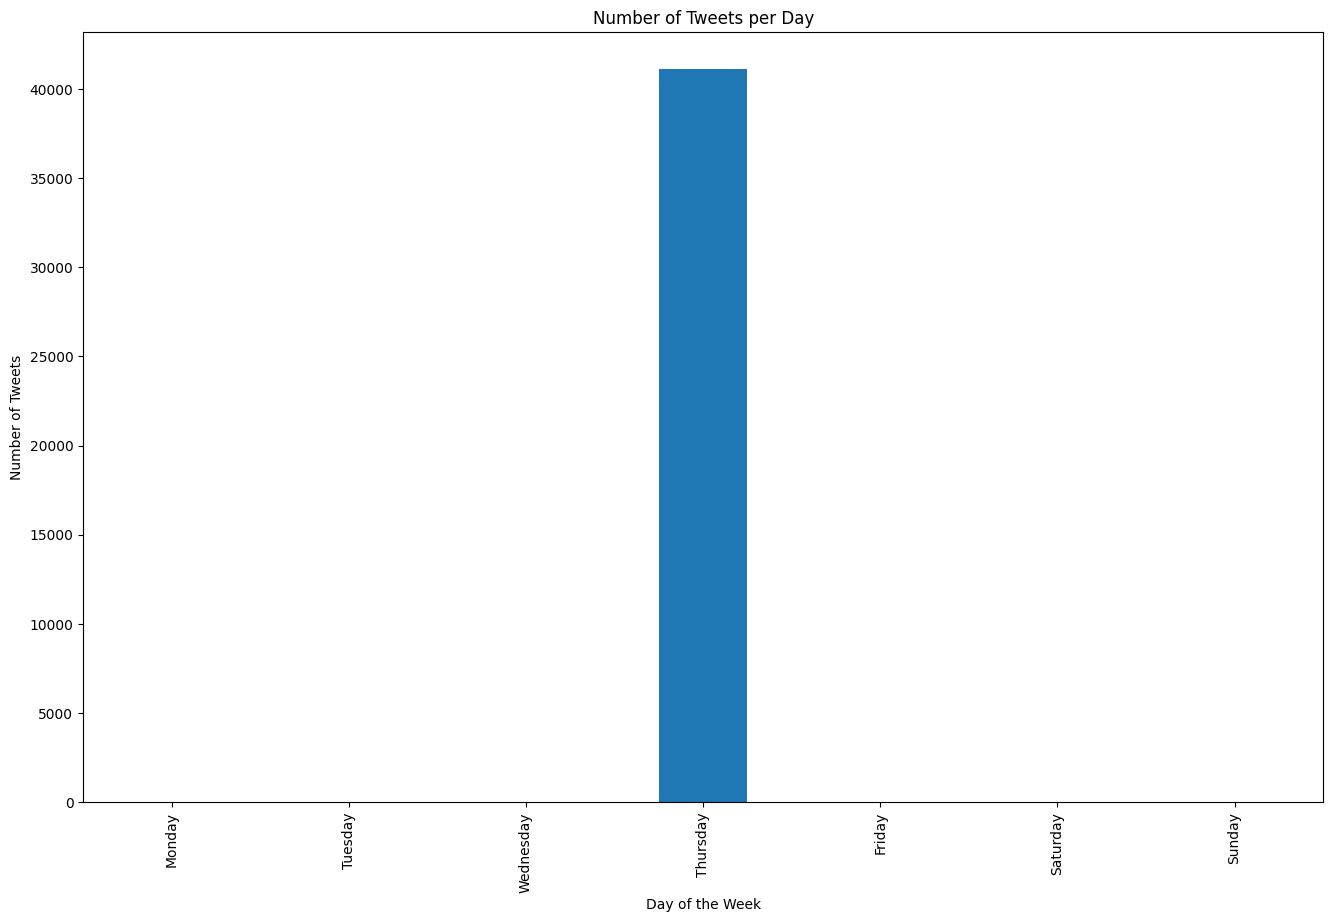

In [35]:


import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Plotting the number of tweets per day of the week
plt.figure(figsize=(16, 10))
plt.title("Number of Tweets per Day")
tweet_count = data["date"].groupby(data["date"].dt.day_name()).count()
tweet_count.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Tweets")
plt.show()


In [36]:
data.head()

,content,date,retweets,favorites,Sentiment,year,month,hour
0,Be sure to tune in and watch Donald Trump on L...,1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,Donald Trump will be appearing on The View tom...,1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,New Blog Post: Celebrity Apprentice Finale and...,1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,"""My persona will never be that of a wallflower...",1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16


###Text Preprocessing - removal of http links

In [37]:
# Removal of the http link using Regular Expression.
for i, row in tweets.iterrows():
    clean_tweet = re.sub(r"http\S+", "", data.at[i, 'content'])
    data.at[i,'content'] = clean_tweet
data.head()

,content,date,retweets,favorites,Sentiment,year,month,hour
0,Be sure to tune in and watch Donald Trump on L...,1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,Donald Trump will be appearing on The View tom...,1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,New Blog Post: Celebrity Apprentice Finale and...,1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,"""My persona will never be that of a wallflower...",1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16


In [38]:
!pip install contractions           #Contraction packge help in expansion of contracted words
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.3 MB/s eta 0:00:00


#### Pre processing: De-contraction of words

In [39]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of tweet column of the dataframe.
for i, row in data.iterrows():
    content = data.at[i, 'content']
    clean_content = replace_contractions(content)
    data.at[i,'content'] = clean_content
data.head()


,content,date,retweets,favorites,Sentiment,year,month,hour
0,Be sure to tune in and watch Donald Trump on L...,1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,Donald Trump will be appearing on The View tom...,1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,New Blog Post: Celebrity Apprentice Finale and...,1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,"""My persona will never be that of a wallflower...",1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16


In [40]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

####Pre Processing : Removal of number

In [41]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['content'] = data['content'].apply(lambda x: remove_numbers(x))
data.head()

,content,date,retweets,favorites,Sentiment,year,month,hour
0,Be sure to tune in and watch Donald Trump on L...,1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,Donald Trump will be appearing on The View tom...,1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,New Blog Post: Celebrity Apprentice Finale and...,1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,"""My persona will never be that of a wallflower...",1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16


### Pre Processing - Tokenization

In [42]:
data['content'] = data.apply(lambda row: nltk.word_tokenize(row['content']), axis=1) # Tokenization of data

data.head()

,content,date,retweets,favorites,Sentiment,year,month,hour
0,"[Be, sure, to, tune, in, and, watch, Donald, T...",1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,"[Donald, Trump, will, be, appearing, on, The, ...",1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,"[Donald, Trump, reads, Top, Ten, Financial, Ti...",1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,"[New, Blog, Post, :, Celebrity, Apprentice, Fi...",1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,"[``, My, persona, will, never, be, that, of, a...",1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16


####Remove non-ascii character

In [43]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

###Preprocessing-Lowercase

- Lowercasing ALL your text data, although commonly overlooked, is one of the simplest and most effective form of text preprocessing. It is applicable to most text mining and NLP problems and can help in cases where your dataset is not very large and significantly helps with consistency of expected output.

- An example where lowercasing is very useful is for search. Imagine, you are looking for documents containing “usa”. However, no results were showing up because “usa” was indexed as “USA”.

In [44]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [45]:
data

,content,date,retweets,favorites,Sentiment,year,month,hour
0,"[Be, sure, to, tune, in, and, watch, Donald, T...",1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,"[Donald, Trump, will, be, appearing, on, The, ...",1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,"[Donald, Trump, reads, Top, Ten, Financial, Ti...",1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,"[New, Blog, Post, :, Celebrity, Apprentice, Fi...",1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,"[``, My, persona, will, never, be, that, of, a...",1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16
...,...,...,...,...,...,...,...,...
41117,"[I, have, never, seen, the, Republican, Party,...",1970-01-01 00:00:00.000000019,32620,213817,positive,2020,1,19
41118,"[Now, Mini, Mike, Bloomberg, is, critical, of,...",1970-01-01 00:00:00.000000019,36239,149571,negative,2020,1,22
41119,"[I, was, thrilled, to, be, back, in, the, Grea...",1970-01-01 00:00:00.000000020,16588,66944,positive,2020,1,1
41120,"[“, In, the, House, ,, the, President, got, le...",1970-01-01 00:00:00.000000020,20599,81921,negative,2020,1,2


In [46]:
data['content'] = data['content'].apply(lambda x: to_lowercase(x))
data.head()

,content,date,retweets,favorites,Sentiment,year,month,hour
0,"[be, sure, to, tune, in, and, watch, donald, t...",1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,"[donald, trump, will, be, appearing, on, the, ...",1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,"[donald, trump, reads, top, ten, financial, ti...",1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,"[new, blog, post, :, celebrity, apprentice, fi...",1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,"[``, my, persona, will, never, be, that, of, a...",1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16


## Preprocessing: Removal of Punctuation

In [47]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [48]:
data['content'] = data['content'].apply(lambda x: remove_punctuation(x))
data.head()

,content,date,retweets,favorites,Sentiment,year,month,hour
0,"[be, sure, to, tune, in, and, watch, donald, t...",1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,"[donald, trump, will, be, appearing, on, the, ...",1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,"[donald, trump, reads, top, ten, financial, ti...",1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,"[new, blog, post, celebrity, apprentice, final...",1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,"[my, persona, will, never, be, that, of, a, wa...",1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16


###Pre-Processing - Removal of stopwords

- Stop words are a set of commonly used words in a language.

- Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

In [49]:
import nltk
nltk.download('stopwords')      #Downloading nltk corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
stopwords = stopwords.words('english')


In [51]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

In [52]:
data['content'] = data['content'].apply(lambda x: remove_stopwords(x))
data.head()

,content,date,retweets,favorites,Sentiment,year,month,hour
0,"[sure, tune, watch, donald, trump, late, night...",1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,"[donald, trump, appearing, view, tomorrow, mor...",1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,"[donald, trump, reads, top, ten, financial, ti...",1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,"[new, blog, post, celebrity, apprentice, final...",1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,"[persona, never, wallflower, would, rather, bu...",1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16


#### Pre-Processing: Lemmatization

- Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.

- The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

In [53]:
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

In [54]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [55]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

data['content'] = data['content'].apply(lambda x: lemmatize_list(x))
data.head()

,content,date,retweets,favorites,Sentiment,year,month,hour
0,"[sure, tune, watch, donald, trump, late, night...",1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,"[donald, trump, appearing, view, tomorrow, mor...",1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,"[donald, trump, read, top, ten, financial, tip...",1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,"[new, blog, post, celebrity, apprentice, final...",1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,"[persona, never, wallflower, would, rather, bu...",1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16


#### Text preprocessing-Normalization(aggregating pre-processing function into one)

In [56]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['content'] = data.apply(lambda row: normalize(row['content']), axis=1)
data.head()

,content,date,retweets,favorites,Sentiment,year,month,hour
0,sure tune watch donald trump late night david ...,1970-01-01 00:00:00.000000004,500,868,positive,2009,5,20
1,donald trump appearing view tomorrow morning d...,1970-01-01 00:00:00.000000005,33,273,positive,2009,5,3
2,donald trump read top ten financial tip late s...,1970-01-01 00:00:00.000000008,12,18,positive,2009,5,15
3,new blog post celebrity apprentice finale less...,1970-01-01 00:00:00.000000008,11,24,positive,2009,5,22
4,persona never wallflower would rather build wa...,1970-01-01 00:00:00.000000012,1399,1965,positive,2009,5,16


###  Most common words in the positive and negative Sentiments tweets

In [57]:
Positive_sent = data[data['Sentiment']=='positive']
Negative_sent = data[data['Sentiment']=='negative']


In [58]:
print('Number of tweets with positive sentiment', Positive_sent['Sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['Sentiment'].count())

Number of tweets with positive sentiment 30940
Number of tweets with negative sentiment 10182


### Wordcloud

In [59]:
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['content'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

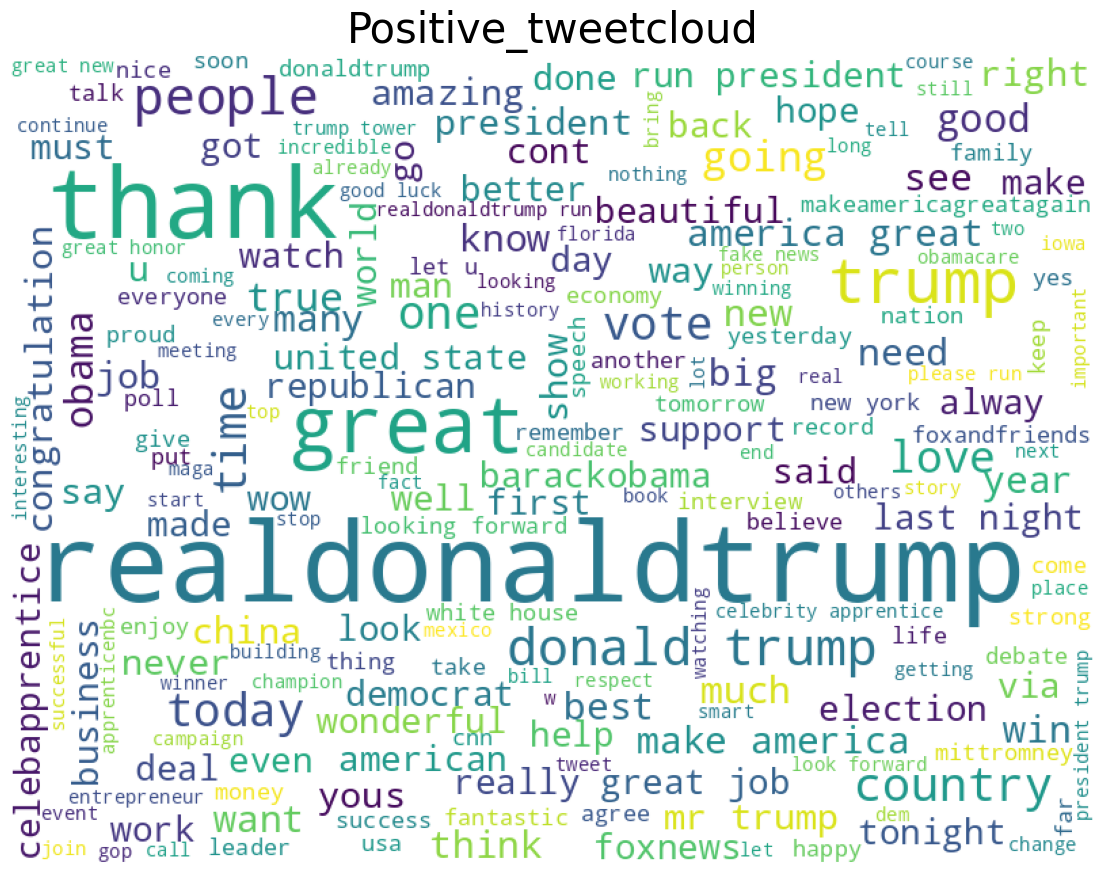

In [63]:
show_wordcloud(Positive_sent, "Positive_tweetcloud")

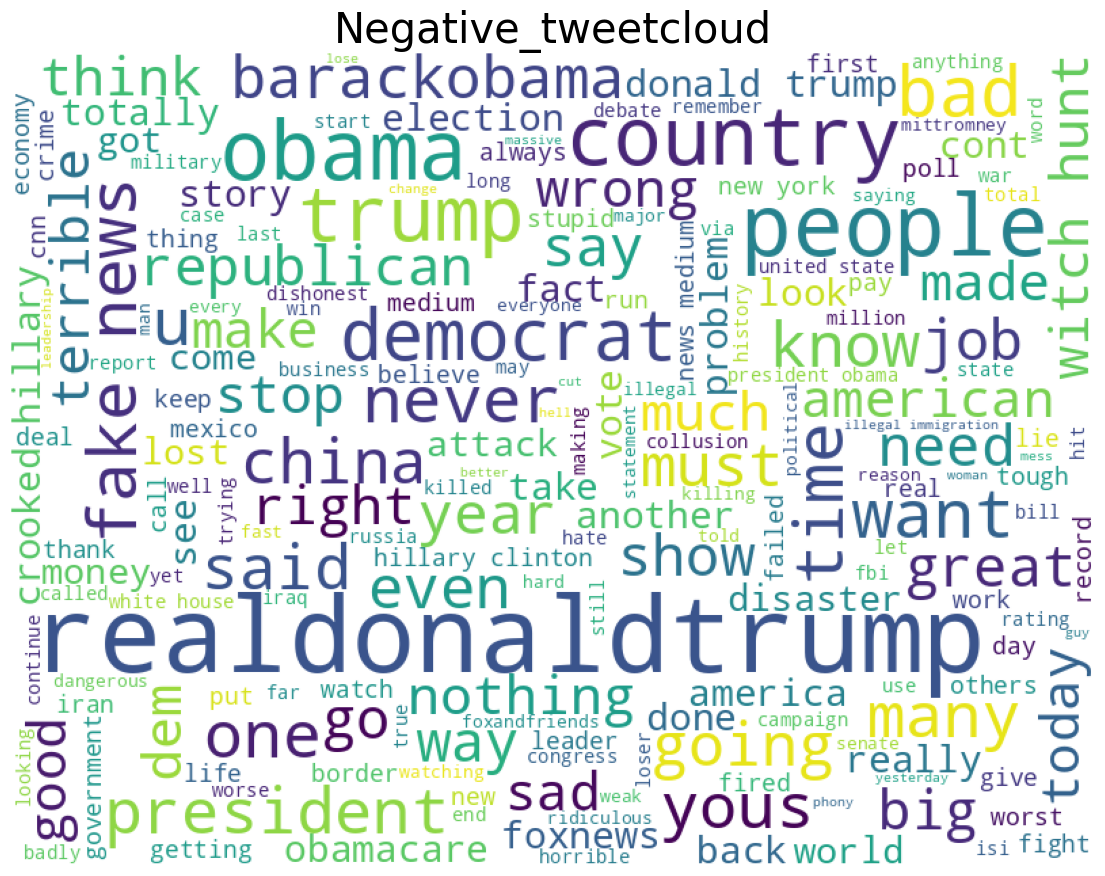

In [64]:
show_wordcloud(Negative_sent, "Negative_tweetcloud")

###Insights



In [ ]:
#Provide your observations and summary